In [1]:
import xarray as xr
import numpy as np


import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a grid file to use with remapcon and use remapcon for each year

In [142]:
import subprocess
import os

# Define the range of years you want to process
start_year = 1992
end_year = 2017  # Replace with the end year you need

# Loop over each year
for year in range(start_year, end_year + 1):
    ds_source = xr.open_dataset(f'/Users/jacoposala/Desktop/oisst_daily_input_files/sst.day.mean.{year}.nc')
    time_source = ds_source.time.values
    
    # Define coordinates
    lons = np.arange(0.5, 360.5, 1.0)
    lats = np.arange(-89.5, 90.5, 1.0)

    # Define the reference date
    reference_date = np.datetime64('1800-01-01T00:00:00.000000000')
    reference_dayzero = 0

    # Calculate the number of days since the reference date for each date in the array
    days_since_reference = (time_source - reference_date).astype('timedelta64[D]').astype(int)
    time = days_since_reference - reference_dayzero

    # Create the Dataset
    ds = xr.Dataset(
        {"data": (("time", "lon", "lat"), np.random.rand(len(time), len(lons), len(lats)))},
        coords={
            "time": time,
            "lon": lons,
            "lat": lats,
        },
    )

    # Assign attributes
    ds['time'] = ds['time'].assign_attrs(
        axis='T', long_name="Time", units="days since 1800-01-01 00:00:00",
        delta_t="0000-00-01 00:00:00", avg_period="0000-00-01 00:00:00"
    )

    ds['lon'] = ds['lon'].assign_attrs(
        units="degrees_east", long_name="Longitude", standard_name='longitude', axis='X'
    )

    ds['lat'] = ds['lat'].assign_attrs(
        units="degrees_north", long_name="Latitude", standard_name='latitude', axis='Y'
    )

    ds['data'] = ds['data'].assign_attrs(
        units="degC", long_name="Daily Sea Surface Temperature"
    )

    # Print the Dataset to check
#     print(ds)

    # Save to a netCDF file
    ds.to_netcdf(f'/Users/jacoposala/Desktop/oisst_daily_input_files/test_1deg_grid_{year}.nc')

    
    # Absolute path to the grid file
    grid_file = f'/Users/jacoposala/Desktop/oisst_daily_input_files/test_1deg_grid_{year}.nc'  # Replace with the correct path

    # Ensure the grid file exists
    if not os.path.isfile(grid_file):
        raise FileNotFoundError(f"Grid file not found: {grid_file}")

    
    input_file = f'/Users/jacoposala/Desktop/oisst_daily_input_files/sst.day.mean.{year}.nc'
    output_file = f'/Users/jacoposala/Desktop/oisst_daily_input_files/sst.day.mean.{year}_rcon.nc'
    
    # Construct the CDO command
    cdo_command = f'cdo -f nc -remapcon,{grid_file} {input_file} {output_file}'
    
    try:
        # Execute the CDO command
        result = subprocess.run(cdo_command, shell=True, check=True, capture_output=True, text=True)
        print(f'Successfully processed {input_file}')
    except subprocess.CalledProcessError as e:
        print(f'Error processing {input_file}')
        print(e.stderr)
    

print('All done!')


Successfully processed /Users/jacoposala/Desktop/oisst_daily_input_files/sst.day.mean.1992.nc
Successfully processed /Users/jacoposala/Desktop/oisst_daily_input_files/sst.day.mean.1993.nc
Successfully processed /Users/jacoposala/Desktop/oisst_daily_input_files/sst.day.mean.1994.nc
Successfully processed /Users/jacoposala/Desktop/oisst_daily_input_files/sst.day.mean.1995.nc
Successfully processed /Users/jacoposala/Desktop/oisst_daily_input_files/sst.day.mean.1996.nc
Successfully processed /Users/jacoposala/Desktop/oisst_daily_input_files/sst.day.mean.1997.nc
Successfully processed /Users/jacoposala/Desktop/oisst_daily_input_files/sst.day.mean.1998.nc
Successfully processed /Users/jacoposala/Desktop/oisst_daily_input_files/sst.day.mean.1999.nc
Successfully processed /Users/jacoposala/Desktop/oisst_daily_input_files/sst.day.mean.2000.nc
Successfully processed /Users/jacoposala/Desktop/oisst_daily_input_files/sst.day.mean.2001.nc
Successfully processed /Users/jacoposala/Desktop/oisst_daily

FileNotFoundError: [Errno 2] No such file or directory: b'/Users/jacoposala/Desktop/oisst_daily_input_files/sst.day.mean.2018.nc'

# plot a map for check

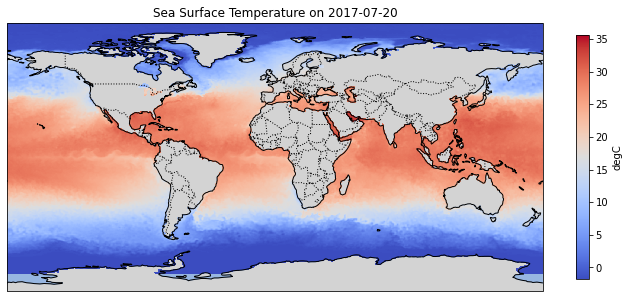

In [147]:
new_oisst1deg = xr.open_dataset('/Users/jacoposala/Desktop/oisst_daily_input_files/sst.day.mean.2017.nc')

# Assuming 'sst' is your DataArray
# Replace with your actual DataArray variable if necessary
sst = new_oisst1deg.sst

# Select a specific timestep, e.g., the first timestep
sst_timestep = sst.isel(time=200)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data
c = ax.pcolormesh(sst_timestep.lon, sst_timestep.lat, sst_timestep,
                  transform=ccrs.PlateCarree(), cmap='coolwarm')

# Add coastlines and other features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN)

# Add a colorbar
cbar = plt.colorbar(c, ax=ax, orientation='vertical', shrink=0.75, label=sst.attrs['units'])

# Add title and labels
ax.set_title(f"Sea Surface Temperature on {str(sst_timestep.time.values)[:10]}")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


In [ ]:
# old
# lons = np.arange(0.5, 360.5, 1.0)
# lats = np.arange(-89.5, 90.5, 1.0)
# # Define the reference date
# reference_date = np.datetime64('1800-01-01T00:00:00.000000000')
# reference_dayzero = 0
# # Calculate the number of days since the reference date for each date in the array
# days_since_reference = (time_source - reference_date).astype('timedelta64[D]').astype(int)
# time = days_since_reference - reference_dayzero

# ds = xr.Dataset(
#     {"data": (("time", "lon", "lat"), np.random.rand(len(time), len(lons), len(lats)))},
#     coords={
#         "time": time,
#         "lon": lons,
#         "lat": lats,
#     },
# )

# ds['time'] = ds.lon.assign_attrs(axis='T', long_name = "Time", units = "days since 1800-01-01 00:00:00", \
#                                 delta_t = "0000-00-01 00:00:00", avg_period = "0000-00-01 00:00:00")

# ds['lon'] = ds.lon.assign_attrs(units="degrees_east", long_name="Longitude", standard_name='longitude', axis='X')

# ds['lat'] = ds.lon.assign_attrs(units="degrees_north", long_name="Latitude", standard_name='latitude', axis='Y')

# # ds['data'] = ds.lon.assign_attrs(units="degC", long_name="Daily Sea Surface Temperature", standard_name='latitude', axis='Y')



# # ds.to_netcdf("/Users/jacoposala/Desktop/oisst_daily_input_files/test_1deg_grid.nc")

In [ ]:
# old
# # Define coordinates
# lons = np.arange(0.5, 360.5, 1.0)
# lats = np.arange(-89.5, 90.5, 1.0)

# # Define the reference date
# reference_date = np.datetime64('1800-01-01T00:00:00.000000000')
# reference_dayzero = 0

# # Calculate the number of days since the reference date for each date in the array
# days_since_reference = (time_source - reference_date).astype('timedelta64[D]').astype(int)
# time = days_since_reference - reference_dayzero

# # Create the Dataset
# ds = xr.Dataset(
#     {"data": (("time", "lon", "lat"), np.random.rand(len(time), len(lons), len(lats)))},
#     coords={
#         "time": time,
#         "lon": lons,
#         "lat": lats,
#     },
# )

# # Assign attributes
# ds['time'] = ds['time'].assign_attrs(
#     axis='T', long_name="Time", units="days since 1800-01-01 00:00:00",
#     delta_t="0000-00-01 00:00:00", avg_period="0000-00-01 00:00:00"
# )

# ds['lon'] = ds['lon'].assign_attrs(
#     units="degrees_east", long_name="Longitude", standard_name='longitude', axis='X'
# )

# ds['lat'] = ds['lat'].assign_attrs(
#     units="degrees_north", long_name="Latitude", standard_name='latitude', axis='Y'
# )

# ds['data'] = ds['data'].assign_attrs(
#     units="degC", long_name="Daily Sea Surface Temperature"
# )

# # Print the Dataset to check
# print(ds)

# # Save to a netCDF file
# ds.to_netcdf("/Users/jacoposala/Desktop/oisst_daily_input_files/test_1deg_grid.nc")


# original grid

In [ ]:
# Example coordinates
lons = np.linspace(0.125, 359.875, 1440)
lats = np.linspace(-89.875, 89.875, 720)

# Create cell bounds
lon_bnds = np.zeros((lons.size, 4))
lat_bnds = np.zeros((lats.size, 4))

# Calculate longitude bounds
for i, lon in enumerate(lons):
    lon_bnds[i] = [lon - 0.125, lon + 0.125, lon + 0.125, lon - 0.125]

# Calculate latitude bounds
for i, lat in enumerate(lats):
    lat_bnds[i] = [lat - 0.125, lat - 0.125, lat + 0.125, lat + 0.125]

# Function to format the values as a string
def format_array(arr, var_name, indent=8):
    arr_str = f"# {var_name}\n{var_name} ="
    for i in range(arr.shape[0]):
        arr_str += "\n" + " " * indent + " ".join(f"{x:.1f}" for x in arr[i])
    return arr_str + "\n"

# Create the formatted strings
xvals_str = format_array(lons.reshape(1, -1), 'xvals')
yvals_str = format_array(lats.reshape(1, -1), 'yvals')
xbounds_str = format_array(lon_bnds, 'xbounds')
ybounds_str = format_array(lat_bnds, 'ybounds')

# Combine all parts into the final string
output_str = "\n".join([xvals_str, xbounds_str, yvals_str, ybounds_str])

# Write to a text file
with open("original_grid.txt", "w") as file:
    file.write(output_str)


# new grid

In [1]:
# Create the new grid coordinates (1-degree spacing)
lons = np.arange(0.5, 360.5, 1.0)
lats = np.arange(-89.5, 90.5, 1.0)

# Create cell bounds
lon_bnds = np.zeros((len(lons), 4))
lat_bnds = np.zeros((len(lats), 4))

# Calculate longitude bounds
for i, lon in enumerate(lons):
    lon_bnds[i] = [lon - 0.5, lon + 0.5, lon + 0.5, lon - 0.5]

# Calculate latitude bounds
for i, lat in enumerate(lats):
    lat_bnds[i] = [lat - 0.5, lat - 0.5, lat + 0.5, lat + 0.5]

# Function to format the values as a string
def format_array(arr, var_name, indent=8):
    arr_str = f"# {var_name}\n{var_name} ="
    for i in range(arr.shape[0]):
        arr_str += "\n" + " " * indent + " ".join(f"{x:.1f}" for x in arr[i])
    return arr_str + "\n"

# Create the formatted strings
xvals_str = format_array(lons.reshape(1, -1), 'xvals')
yvals_str = format_array(lats.reshape(1, -1), 'yvals')
xbounds_str = format_array(lon_bnds, 'xbounds')
ybounds_str = format_array(lat_bnds, 'ybounds')

# Combine all parts into the final string
output_str = "\n".join([xvals_str, xbounds_str, yvals_str, ybounds_str])

# Write to a text file
with open("new_grid.txt", "w") as file:
    file.write(output_str)

print("New grid file 'new_grid_output.txt' created.")


New grid file 'new_grid_output.txt' created.


# subset OISST data for testing matlab code

In [28]:
ds = xr.open_dataset('/Users/jacoposala/Desktop/oisst_daily_input_files/sst.day.mean.1994.nc')

In [29]:
cropped_ds = ds.sel(lat=slice(lat_min,lat_max), lon=slice(lon_min,lon_max))


In [38]:
import xarray as xr
import os

# Define the latitude and longitude box
# lon_min = 209.5
# lon_max = lon_min + 6 # 16
# lat_min = 39.5
# lat_max = lat_min + 4 # 11  


lon_min = 209.5
lon_max = lon_min + 16
lat_min = 39.5
lat_max = lat_min + 11
    
# Directory containing the files
input_dir = '/Volumes/MyPassportForMac/MAC_15/NASA_project/2023/NEW_heatBudgetECCO_daily/data/OISST_daily_input_files/'
output_dir = '/Users/jacoposala/Downloads/test_region_OISST_daily/'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to process each file
def process_file(year):
    try:
        # Construct the file path
        file_path = os.path.join(input_dir, f'sst.day.mean.{year}.nc')
        
        # Open the dataset
        ds = xr.open_dataset(file_path)
        
        # Inspect the longitude range
        lon_values = ds.lon.values
        print(f"Year: {year}")
        print(f"Longitude values range: {lon_values.min()} to {lon_values.max()}")
        
        # Adjust the longitude range if necessary
        if lon_values.min() >= 0 and lon_values.max() <= 360:
            # Longitudes are in 0 to 360 range
            if lon_min < 0:
                lon_min_adjusted = lon_min + 360
            else:
                lon_min_adjusted = lon_min

            if lon_max < 0:
                lon_max_adjusted = lon_max + 360
            else:
                lon_max_adjusted = lon_max
        else:
            # Longitudes are in -180 to 180 range, no adjustment needed
            lon_min_adjusted = lon_min
            lon_max_adjusted = lon_max
        
        print(f"Adjusted longitude range: {lon_min_adjusted} to {lon_max_adjusted}")
        
        # Select the data within the specified latitude and longitude box for the specific variable
        ds_cut = ds['sst'].sel(lat=slice(lat_min, lat_max), lon=slice(lon_min_adjusted, lon_max_adjusted))
        
        # Debug: Check the selected subset
        if ds_cut.lon.size == 0:
            raise ValueError("Longitude selection resulted in an empty subset. Please check the longitude range and values in the dataset.")
        
        # Debug: Print dimensions and data variables information
        print(f"Processing file: {file_path}")
        print(f"Original dimensions: {ds.dims}")
        print(f"Subset dimensions: {ds_cut.dims}")
        print(f"Data variables: {ds_cut.name}")
        
        # Define the output file path
        output_file = os.path.join(output_dir, f'sst.day.mean.{year}_subset_lonmin{lon_min}_lonmax{lon_max}_latmin_{lat_min}_latmax{lat_max}.nc')
        
        # Save the cut dataset to a new NetCDF file
        ds_cut.to_netcdf(output_file)
        print(f"File saved successfully: {output_file}")
    
    except Exception as e:
        print(f"Error processing file for year {year}: {e}")

# Iterate over each year from 1993 to 2017
for year in range(1993, 2018):
    process_file(year)
    

print("Processing complete.")


Year: 1993
Longitude values range: 0.125 to 359.875
Adjusted longitude range: 209.5 to 225.5
Processing file: /Volumes/MyPassportForMac/MAC_15/NASA_project/2023/NEW_heatBudgetECCO_daily/data/OISST_daily_input_files/sst.day.mean.1993.nc
Original dimensions: Frozen({'time': 365, 'lat': 720, 'lon': 1440})
Subset dimensions: ('time', 'lat', 'lon')
Data variables: sst
File saved successfully: /Users/jacoposala/Downloads/test_region_OISST_daily/sst.day.mean.1993_subset_lonmin209.5_lonmax225.5_latmin_39.5_latmax50.5.nc
Year: 1994
Longitude values range: 0.125 to 359.875
Adjusted longitude range: 209.5 to 225.5
Processing file: /Volumes/MyPassportForMac/MAC_15/NASA_project/2023/NEW_heatBudgetECCO_daily/data/OISST_daily_input_files/sst.day.mean.1994.nc
Original dimensions: Frozen({'time': 365, 'lat': 720, 'lon': 1440})
Subset dimensions: ('time', 'lat', 'lon')
Data variables: sst
File saved successfully: /Users/jacoposala/Downloads/test_region_OISST_daily/sst.day.mean.1994_subset_lonmin209.5_lo

File saved successfully: /Users/jacoposala/Downloads/test_region_OISST_daily/sst.day.mean.2009_subset_lonmin209.5_lonmax225.5_latmin_39.5_latmax50.5.nc
Year: 2010
Longitude values range: 0.125 to 359.875
Adjusted longitude range: 209.5 to 225.5
Processing file: /Volumes/MyPassportForMac/MAC_15/NASA_project/2023/NEW_heatBudgetECCO_daily/data/OISST_daily_input_files/sst.day.mean.2010.nc
Original dimensions: Frozen({'time': 365, 'lat': 720, 'lon': 1440})
Subset dimensions: ('time', 'lat', 'lon')
Data variables: sst
File saved successfully: /Users/jacoposala/Downloads/test_region_OISST_daily/sst.day.mean.2010_subset_lonmin209.5_lonmax225.5_latmin_39.5_latmax50.5.nc
Year: 2011
Longitude values range: 0.125 to 359.875
Adjusted longitude range: 209.5 to 225.5
Processing file: /Volumes/MyPassportForMac/MAC_15/NASA_project/2023/NEW_heatBudgetECCO_daily/data/OISST_daily_input_files/sst.day.mean.2011.nc
Original dimensions: Frozen({'time': 365, 'lat': 720, 'lon': 1440})
Subset dimensions: ('time'

In [39]:
test = xr.open_dataset('/Users/jacoposala/Downloads/test_region_OISST_daily/sst.day.mean.1993_subset.nc')

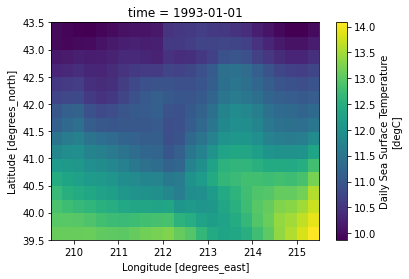

In [43]:
test['sst'][0,:,:].plot()